# **Object Identification Study**

## Objectives

* Answer business requirement 1:
    * The client wants a study of the CIFAR-10 dataset, including understanding class distribution, sample images, and identifying any challenges such as imbalanced classes.

## Inputs

* inputs/cifar10_dataset_small/train
* inputs/cifar10_dataset_small/validation
* inputs/cifar10_dataset_small/test

## Outputs

* Mean and standard deviation of pixel values across the dataset
* Analysis of differences between images from similar classes
* Evaluation of pixel distributions
* Plot showing the number of images per class for training, validation, and test sets
* Code to generate and display an image montage for each class on a dashboard
* Pickle files:
    * class_labels.pkl: Contains the list of class labels
    * image_counts.pkl: Contains the number of images per class for training, validation, and test sets
    * label_mapping.pkl: Maps class labels to unique integer values


---

# Install packages and libraries

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread
from PIL import Image
import pickle


# Change and Set directories

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [4]:
current_dir = os.getcwd()
print('Current folder: ' + current_dir)
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print('New folder: ' + current_dir)

Current folder: /workspace/SnapSortAI/jupyter_notebooks
New folder: /workspace/SnapSortAI


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspace/SnapSortAI'

### Dataset root directory and paths

In [6]:
dataset_root_dir = 'inputs/cifar10_dataset_small'
train_path = dataset_root_dir + '/train'
validation_path = dataset_root_dir + '/validation'
test_path = dataset_root_dir + '/test'
train_path

'inputs/cifar10_dataset_small/train'

### Set the output directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print(f'Version {version} is already available.')
    pass
else:
    os.makedirs(name=file_path)
    print(f'New directory for version {version} has been created')

Version v1 is already available.


### Set the label names

In [8]:
labels = os.listdir(train_path)
labels.sort()
print("Class names:", labels)

Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


---

## Image Shape

Compute the avarage image size

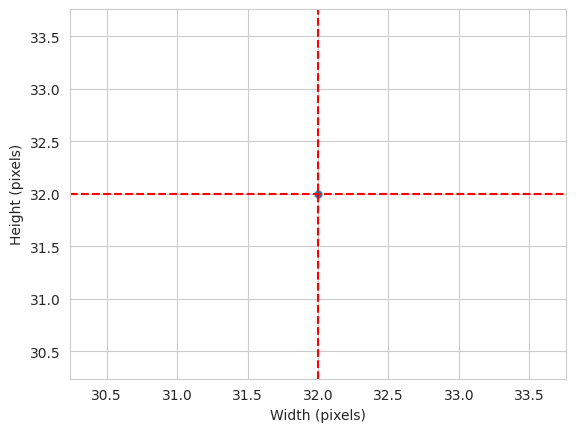

Width average: 32 
Height average: 32


In [11]:

dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

Images size for training the model is the average from all images in the train set.

In [12]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(32, 32, 3)

Save the image shape embeddings

In [13]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

## Visualize Sample Images from Each Class

Since the data is image-based, we will use a Python library like PIL (Python Imaging Library) to load example images and analyze its structure. Given that all images have the same size, we can assume uniformity in their dimensions and processing requirements.

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i, label in enumerate(labels):
    # Load the first image from each class
    image_path = os.path.join(train_path, label, os.listdir(os.path.join(train_path, label))[0])
    image = Image.open(image_path)
    
    # Get image size
    width, height = image.size
    
    
    axs[i].imshow(image)
    
    # Title with label and image size
    axs[i].set_title(f'{label}\n{width}x{height}')
    
    
    axs[i].axis('off')

plt.tight_layout()
plt.show()


## Class distribution

We build upon the work done in the previous notebook where the CIFAR-10 dataset was reduced and divided into training, validation and test sets.
As plotted below, there are exactly 350 images/class in the train set, 100 images/class in the test set and 50 images/class in validation set.

In [ ]:
def count_images_in_path(path):
    class_counts = {}
    for label in labels:
        label_path = os.path.join(path, label)
        class_counts[label] = len(os.listdir(label_path))
    return class_counts

# Count images in train, validation, and test sets
train_counts = count_images_in_path(train_path)
validation_counts = count_images_in_path(validation_path)
test_counts = count_images_in_path(test_path)

# Convert to DataFrame for plotting
train_df = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Train'])
validation_df = pd.DataFrame(list(validation_counts.items()), columns=['Class', 'Validation'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Class', 'Test'])

# Merge dataframes for visualization
df = pd.merge(train_df, validation_df, on='Class')
df = pd.merge(df, test_df, on='Class')

# Plot the number of images per class for train, validation, and test sets
df.set_index('Class').plot(kind='bar', figsize=(12, 6))
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Train, Validation, and Test Sets')
plt.xticks(rotation=45)
plt.savefig(f"{file_path}/distribution_plot.png", bbox_inches='tight', dpi=150)

plt.tight_layout()
plt.show()

## Serialize Class Names and Counts

Store the image counts, class labels and the converted class labels for future use in the model.

In [ ]:
# Save the class labels
class_labels_path = os.path.join(file_path, 'class_labels.pkl')
with open(class_labels_path, 'wb') as f:
    pickle.dump(labels, f)
print(f"Class labels saved to {class_labels_path}")

# Save the image counts
image_counts_path = os.path.join(file_path, 'image_counts.pkl')
image_counts = {'train': train_counts, 'validation': validation_counts, 'test': test_counts}
with open(image_counts_path, 'wb') as f:
    pickle.dump(image_counts, f)
print(f"Image counts saved to {image_counts_path}")

# Mapping from class labels to integers
label_mapping = {label: idx for idx, label in enumerate(labels)}


label_mapping_path = os.path.join(file_path, 'label_mapping.pkl')
with open(label_mapping_path, 'wb') as f:
    pickle.dump(label_mapping, f)
print(f"Label mapping saved to {label_mapping_path}")

print("Label mapping:", label_mapping)


## Mean and Standard deviation of pixels

In [ ]:
# Initialize lists to store pixel values
pixel_values = []


for label in labels:
    label_path = os.path.join(train_path, label)
    
    for image_file in os.listdir(label_path):
        image_path = os.path.join(label_path, image_file)
        image = Image.open(image_path)
        
        # Convert image to a NumPy array and normalize pixel values to [0, 1] range
        image_array = np.array(image) / 255.0
        
        
        pixel_values.append(image_array)


pixel_values = np.stack(pixel_values)

# Calculate the mean and standard deviation across all pixel values (for each RGB channel)
mean = np.mean(pixel_values, axis=(0, 1, 2))
std_dev = np.std(pixel_values, axis=(0, 1, 2))

print(f'Mean of pixel values: {mean}')
print(f'Standard deviation of pixel values: {std_dev}')

# Plotting the Mean and Standard Deviation
labels_rgb = ['Red', 'Green', 'Blue']

# Create a figure and axes (mean and std deviation)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot - mean
axs[0].bar(labels_rgb, mean, color=['red', 'green', 'blue'])
axs[0].set_title('Mean Pixel Values by Channel')
axs[0].set_ylim(0, 1)  # Pixel values are normalized between 0 and 1
axs[0].set_ylabel('Mean')

# Plot - standard deviation
axs[1].bar(labels_rgb, std_dev, color=['red', 'green', 'blue'])
axs[1].set_title('Standard Deviation of Pixel Values by Channel')
axs[1].set_ylim(0, 1)  # Also in the normalized pixel range
axs[1].set_ylabel('Standard Deviation')


plt.tight_layout()
plt.show()


## Variability study

Pixel-wise average of all images.

In [ ]:
def compute_average_image(image_list):
    average_image = np.mean(np.stack(image_list), axis=0)
    return np.clip(average_image, 0, 1)  # Ensure values are in [0, 1] range

# Initialize lists to store average images
average_images = []

for label in labels:
    label_path = os.path.join(train_path, label)
    images = [Image.open(os.path.join(label_path, image_file)) for image_file in os.listdir(label_path)]
    image_arrays = [np.array(image) / 255.0 for image in images]
    avg_image = compute_average_image(image_arrays)
    average_images.append(avg_image)

# Plot the average images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i, (label, avg_image) in enumerate(zip(labels, average_images)):
    axs[i].imshow(avg_image)
    axs[i].set_title(label)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


### Save or plot mean and variability of images

In [ ]:
def load_images_as_array(my_data_dir, new_size=(32, 32), n_images_per_label=20):
    """
    Loads images into a numpy array, resizing and normalizing them.

    Args:
        my_data_dir (str): Directory containing subdirectories for each label.
        new_size (tuple): Size to which each image will be resized.
        n_images_per_label (int): Maximum number of images per label to load.

    Returns:
        tuple: (X, y) where X is an array of images and y is an array of labels.
    """
    labels = os.listdir(my_data_dir)
    num_labels = len(labels)
    
    # Initialize arrays
    X = np.zeros((num_labels * n_images_per_label, new_size[0], new_size[1], 3), dtype=np.float32)
    y = np.zeros(num_labels * n_images_per_label, dtype=object)
    
    for label_index, label in enumerate(labels):
        label_path = os.path.join(my_data_dir, label)
        image_files = os.listdir(label_path)[:n_images_per_label]
        
        for img_index, image_filename in enumerate(image_files):
            image_path = os.path.join(label_path, image_filename)
            img = Image.open(image_path).resize(new_size)  # Resizing to new_size
            
            # Convert image to array and normalize
            img_array = np.array(img) / 255.0
            
            # Fill the preallocated array
            X[label_index * n_images_per_label + img_index] = img_array
            y[label_index * n_images_per_label + img_index] = label

    return X, y

# Usage
image_shape = (32, 32)  # Keeping original size
X, y = load_images_as_array(my_data_dir=train_path, new_size=image_shape, n_images_per_label=8)
print(X.shape, y.shape)


In [ ]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False):
    """
    Plots the mean and variability of images for each label.

    Args:
        X (numpy.ndarray): Array of images (shape: [num_images, height, width, channels]).
        y (numpy.ndarray): Labels for images.
        figsize (tuple): Size of the figure to be plotted.
        save_image (bool): If True, saves the plot as an image file.
        file_path (str): Directory to save the image files.
    """
    unique_labels = np.unique(y)
    
    if save_image and not os.path.exists(file_path):
        os.makedirs(file_path)

    for label_to_display in unique_labels:
        sns.set_style("white")
        
        # Create a mask for images with the current label
        boolean_mask = (y == label_to_display)
        arr = X[boolean_mask]
        
        # Calculate average and standard deviation images
        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        
        # Normalize images for display
        avg_img = (avg_img - np.min(avg_img)) / (np.max(avg_img) - np.min(avg_img))
        std_img = (std_img - np.min(std_img)) / (np.max(std_img) - np.min(std_img))
        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average image for label {label_to_display}")
        axes[0].imshow(avg_img)
        axes[0].axis('off')
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img)
        axes[1].axis('off')
        
        if save_image:
            plt.savefig(f"{file_path}/avg_var_{label_to_display}.png", bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()

# Example usage
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True)


## Differentiate between average images from similar classes

In [ ]:
def diff_bet_avg_image_labels_data(X, y, label_pairs, figsize=(15, 5), save_image=False):
    """
    Calculates and plots the average images and differences between specified pairs of labels.

    Args:
        X (numpy.ndarray): Array of images (shape: [num_images, height, width, channels]).
        y (numpy.ndarray): Array of labels.
        label_pairs (list of tuples): List of tuples where each tuple contains two labels to compare.
        figsize (tuple): Size of the plot.
        save_image (bool): Whether to save the plot as an image.
        file_path (str): Directory path to save the image if save_image is True.
    """
    sns.set_style("white")
    
    # Ensure output directory exists
    if save_image and not os.path.exists(file_path):
        os.makedirs(file_path)

    unique_labels = np.unique(y)
    
    for label1, label2 in label_pairs:
        if (label1 not in unique_labels) or (label2 not in unique_labels):
            print(f"Skipping comparison: Either label '{label1}' or label '{label2}' is not in the dataset.")
            continue

        # Mean image for label1
        images_label1 = X[y == label1]
        label1_avg = np.mean(images_label1, axis=0)

        # Mean image for label2
        images_label2 = X[y == label2]
        label2_avg = np.mean(images_label2, axis=0)

        # Difference between average images
        difference_mean = label1_avg - label2_avg
        
        # Normalize images for display
        label1_avg = (label1_avg - np.min(label1_avg)) / (np.max(label1_avg) - np.min(label1_avg))
        label2_avg = (label2_avg - np.min(label2_avg)) / (np.max(label2_avg) - np.min(label2_avg))
        difference_mean = (difference_mean - np.min(difference_mean)) / (np.max(difference_mean) - np.min(difference_mean))
        
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
        axes[0].imshow(label1_avg)
        axes[0].set_title(f'Average {label1}')
        axes[0].axis('off')
        
        axes[1].imshow(label2_avg)
        axes[1].set_title(f'Average {label2}')
        axes[1].axis('off')
        
        axes[2].imshow(difference_mean)
        axes[2].set_title(f'Difference: {label1} - {label2}')
        axes[2].axis('off')
        
        if save_image:
            plt.savefig(f"{file_path}/avg_diff_{label1}_{label2}.png", bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()

label_pairs = [
    ('deer', 'horse'),
    ('truck', 'automobile'),
    ('airplane', 'bird')
]

diff_bet_avg_image_labels_data(X=X, y=y, label_pairs=label_pairs, figsize=(15, 5), save_image=True)


### Image Montage

In [ ]:
def plot_image_montage(image_list, title, ncols=3):
    n_images = len(image_list)
    n_rows = (n_images + ncols - 1) // ncols
    fig, axs = plt.subplots(n_rows, ncols, figsize=(ncols * 3, n_rows * 3))
    axs = axs.flatten()
    
    for i, img in enumerate(image_list):
        axs[i].imshow(img)
        axs[i].axis('off')
    
    # Hide any unused subplots
    for i in range(n_images, len(axs)):
        axs[i].axis('off')
    
 
    plt.suptitle(title, fontsize=16, y=0.95)
    plt.tight_layout()
    plt.show()

for label in labels:
    label_path = os.path.join(train_path, label)
    image_files = os.listdir(label_path)
    images = [Image.open(os.path.join(label_path, image_file)) for image_file in image_files[:3]]  # Display first 3 images in class
    plot_image_montage(images, title=label)


---

## Conclusions and Next steps

Images from study has been saved to output folder.


### Observations:
The bad resolution of the small images makes it hard to see any differances.
Images are too similar to get good results from image study comparison.

### Next Steps:
Proceed to next notebook for Modelling and evaluation.

---